In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
pc = pd.read_csv('police.csv')

In [4]:
pc.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [5]:
pc.shape

(91741, 15)

In [6]:
pc.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [7]:
pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

In [8]:
pc['county_name'].isna().count()

91741

In [9]:
pc = pc.drop(['county_name'], axis=1)

In [10]:
# Do women or men speed more often? (driver_gender, violation)

In [11]:
pc_speeding = pc.loc[pc['violation'] == 'Speeding']

In [12]:
type(pc_speeding)

pandas.core.frame.DataFrame

In [13]:
pc_speeding.groupby(['driver_gender']).describe()

driver_age_raw                                               \
                       count         mean        std  min     25%     50%   
driver_gender                                                               
F                    15482.0  1974.767666  72.524559  0.0  1969.0  1981.0   
M                    32979.0  1972.413384  90.585169  0.0  1966.0  1979.0   

                              driver_age                                    \
                  75%     max      count       mean        std   min   25%   
driver_gender                                                                
F              1987.0  2919.0    15453.0  32.529023  12.353350  16.0  22.0   
M              1986.0  8801.0    32906.0  34.000729  13.009874  15.0  23.0   

                                 
                50%   75%   max  
driver_gender                    
F              29.0  41.0  84.0  
M              30.0  43.0  90.0

In [14]:
pc_speeding['driver_gender'].value_counts()

M    32979
F    15482
Name: driver_gender, dtype: int64

In [15]:
pc_speeding['driver_gender'].value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [16]:
pc[pc['driver_gender'] == 'M']['violation'].value_counts(normalize=True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [17]:
pc[pc['driver_gender'] == 'F']['violation'].value_counts(normalize=True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

In [18]:
pc.groupby('driver_gender')['violation'].value_counts()

driver_gender  violation          
F              Speeding               15482
               Moving violation        3204
               Equipment               2487
               Registration/plates     1013
               Other                    690
               Seat belt                635
M              Speeding               32979
               Moving violation       13020
               Equipment               8533
               Other                   3627
               Registration/plates     2419
               Seat belt               2317
Name: violation, dtype: int64

In [19]:
pc.groupby('driver_gender')['violation'].value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

In [20]:
pc.groupby('driver_gender')['violation'].value_counts(normalize=True).loc[:, 'Speeding']

driver_gender
F    0.65850
M    0.52435
Name: violation, dtype: float64

In [21]:
pc.groupby('driver_gender')['violation'].value_counts(normalize=True).unstack()

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,0.105780,0.136277,0.029348,0.043086,0.027009,0.65850
M,0.135671,0.207012,0.057668,0.038461,0.036839,0.52435


In [22]:
pc.groupby('driver_gender')['violation'].value_counts(normalize=True).unstack().loc[:, 'Speeding']

driver_gender
F    0.65850
M    0.52435
Name: Speeding, dtype: float64

# Does gender affect who gets searched during a stop?

In [23]:
# driver_gender , search_conductor

In [24]:
pc.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [25]:
pc.groupby('driver_gender')['search_conducted'].value_counts()

driver_gender  search_conducted
F              False               23040
               True                  471
M              False               60170
               True                 2725
Name: search_conducted, dtype: int64

In [26]:
pc.groupby('driver_gender')['search_conducted'].value_counts(normalize=True)

driver_gender  search_conducted
F              False               0.979967
               True                0.020033
M              False               0.956674
               True                0.043326
Name: search_conducted, dtype: float64

In [27]:
pc['search_conducted'].value_counts(normalize=True)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [28]:
pc.groupby('driver_gender')['search_conducted'].mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

In [29]:
# Será que o tipo de violação importa? Pois só olhei para o sexo

In [30]:
pc.groupby(['driver_gender', 'violation'])['search_conducted'].value_counts()

driver_gender  violation            search_conducted
F              Equipment            False                2381
                                    True                  106
               Moving violation     False                3088
                                    True                  116
               Other                False                 651
                                    True                   39
               Registration/plates  False                 946
                                    True                   67
               Seat belt            False                 627
                                    True                    8
               Speeding             False               15347
                                    True                  135
M              Equipment            False                7935
                                    True                  598
               Moving violation     False               12241
                 

In [31]:
pc.groupby(['driver_gender', 'violation'])['search_conducted'].mean()

driver_gender  violation          
F              Equipment              0.042622
               Moving violation       0.036205
               Other                  0.056522
               Registration/plates    0.066140
               Seat belt              0.012598
               Speeding               0.008720
M              Equipment              0.070081
               Moving violation       0.059831
               Other                  0.047146
               Registration/plates    0.110376
               Seat belt              0.037980
               Speeding               0.024925
Name: search_conducted, dtype: float64

In [32]:
pc.groupby(['violation', 'driver_gender'])['search_conducted'].mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

# Why is search_type missing so often?

In [33]:
pc['search_type'].sample(10)

70864    NaN
87648    NaN
27713    NaN
60942    NaN
58891    NaN
7693     NaN
48441    NaN
15499    NaN
50458    NaN
41790    NaN
Name: search_type, dtype: object

In [34]:
pc.isna().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [35]:
pc['search_conducted'].value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [36]:
# search_type is missing everytime a search is not conducted

In [37]:
pc['search_type'].value_counts(dropna=False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Incident to Arrest,Protective Frisk                            33
Probable Cause,Protective Frisk                                33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Incident to Arrest,Inventory,Protective Frisk                  11
Inventory,

# During a search, how often a driver is frisked? (revistado)

In [38]:
pc['search_type'].str.contains('Frisk').value_counts(dropna=False)

NaN      88545
False     2922
True       274
Name: search_type, dtype: int64

In [39]:
pc['search_type'].str.contains('Frisk').value_counts(normalize=True, dropna=True)

False    0.914268
True     0.085732
Name: search_type, dtype: float64

# Which year had the least number of stops?

In [40]:
pc['year'] = pc['stop_date']

In [41]:
pc['year'] = pd.to_datetime(pc['year']).dt.year

In [42]:
pc['year'].describe()

count    91741.000000
mean      2010.267699
std          3.029080
min       2005.000000
25%       2008.000000
50%       2010.000000
75%       2013.000000
max       2015.000000
Name: year, dtype: float64

In [43]:
pc['year'].value_counts(ascending=False)

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: year, dtype: int64

In [44]:
pc['stop_date'].str.slice(0, 4).value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [45]:
pc.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005


In [46]:
combined = pc['stop_date'].str.cat(pc['stop_time'], sep=' ')
combined.head()

0    2005-01-02 01:55
1    2005-01-18 08:15
2    2005-01-23 23:15
3    2005-02-20 17:15
4    2005-03-14 10:00
Name: stop_date, dtype: object

In [47]:
pc['stop_datetime'] = pd.to_datetime(combined)

In [48]:
pc['stop_datetime'].dt.year.value_counts(ascending=False)

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_datetime, dtype: int64

# How does drug activity change by time of day?

In [49]:
# stop_datetime , drugs_related_stop

In [50]:
pc['hours'] = pc['stop_datetime'].dt.hour

In [51]:
pc.groupby(pc['hours'])['drugs_related_stop'].sum()

hours
0     103
1      60
2      46
3      20
4       3
5       1
6      10
7      15
8      14
9      43
10     42
11     41
12     16
13     50
14     44
15     31
16     22
17     16
18     22
19     30
20     27
21     20
22     47
23     92
Name: drugs_related_stop, dtype: int64

In [52]:
pc['drugs_related_stop'].mean()

0.008883705213590434

In [53]:
pc.groupby(pc['stop_datetime'].dt.hour)['drugs_related_stop'].sum()

stop_datetime
0     103
1      60
2      46
3      20
4       3
5       1
6      10
7      15
8      14
9      43
10     42
11     41
12     16
13     50
14     44
15     31
16     22
17     16
18     22
19     30
20     27
21     20
22     47
23     92
Name: drugs_related_stop, dtype: int64

<AxesSubplot:xlabel='stop_datetime'>

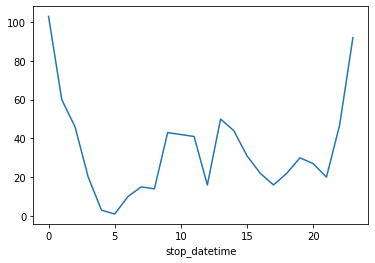

In [54]:
pc.groupby(pc['stop_datetime'].dt.hour)['drugs_related_stop'].sum().plot()

In [55]:
import altair as alt

In [56]:
data = pc.groupby(pc['stop_datetime'].dt.hour)['drugs_related_stop'].sum()

In [57]:
alt.renderers.enable('default')

RendererRegistry.enable('default')

In [58]:
type(data)

pandas.core.series.Series

In [59]:
x = data.index.tolist()

In [60]:
y = data.values.tolist()

In [61]:
data = pd.DataFrame({
    'x': x,
    'y': y
})
data

,x,y
0,0,103
1,1,60
2,2,46
3,3,20
4,4,3
5,5,1
6,6,10
7,7,15
8,8,14
9,9,43


In [62]:
alt.Chart(data).mark_square(
    color='magenta',
    opacity=0.9,
    size=70
).encode(
    alt.X('x', type='quantitative', title='Horas'),
    alt.Y('y', type='quantitative', title='Nº de paradas'),
    tooltip = [
        alt.Tooltip('x:N', title='Horário'),
        alt.Tooltip('y:Q', title='Nº de paradas')]
)



alt.Chart(...)

# Do most stops occur at night?

In [63]:
pc.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year,stop_datetime,hours
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,2005-01-02 01:55:00,1
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,2005-01-18 08:15:00,8
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,2005-01-23 23:15:00,23
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005,2005-02-20 17:15:00,17
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005,2005-03-14 10:00:00,10


In [64]:
pc.groupby('hours')['hours'].count()

hours
0     5221
1     4442
2     2975
3     1172
4      254
5      210
6     3290
7     4572
8     5210
9     6838
10    7350
11    5877
12    3582
13    4842
14    5634
15    4832
16    3844
17    2900
18    2168
19    2587
20    3340
21    1499
22    3473
23    5629
Name: hours, dtype: int64

<AxesSubplot:xlabel='hours'>

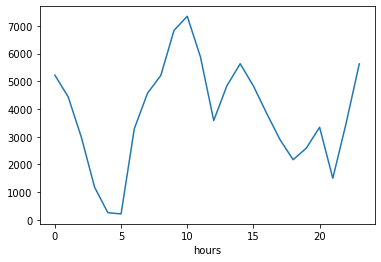

In [65]:
pc.groupby('hours')['hours'].count().plot()

In [66]:
data = pc.groupby('hours')['hours'].count()

In [67]:
x = data.index.tolist()
y = data.values.tolist()

In [68]:
data = pd.DataFrame({
    'x': x,
    'y': y
})
data

,x,y
0,0,5221
1,1,4442
2,2,2975
3,3,1172
4,4,254
5,5,210
6,6,3290
7,7,4572
8,8,5210
9,9,6838


In [69]:
alt.Chart(data).mark_bar(
    color='red',
    opacity=0.9,
    size=10
).encode(
    alt.X('x', type='quantitative', title='Horas', axis=alt.Axis(values=[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22])),
    alt.Y('y', type='quantitative', title='Nº de paradas'),
    tooltip = [
        alt.Tooltip('x:N', title='Horário'),
        alt.Tooltip('y:Q', title='Nº de paradas')]
)

alt.Chart(...)

In [70]:
# outra forma de responder apenas com números se não precisarmos visualmente

In [71]:
pc[(pc['stop_datetime'].dt.hour > 4) & (pc['stop_datetime'].dt.hour < 23)].shape

(72048, 17)

In [72]:
pc.shape

(91741, 17)

# Find the bad data in the stop_duration column and fix it

In [73]:
pc['stop_duration'].value_counts(dropna=False) # o que é esse 1? e 2?

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

In [74]:
pc.loc[(pc['stop_duration'] == '1') | (pc['stop_duration'] == '2'), 'stop_duration'] = 'NaN'

In [75]:
pc['stop_duration'].value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

In [76]:
import numpy as np

In [77]:
pc.loc[pc['stop_duration'] == 'NaN', 'stop_duration'] = np.nan

In [78]:
pc['stop_duration'].value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64

In [79]:
# da pra usar replace tb